# Initializing project

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import time

#for google access
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
project_path = "../content/drive/My Drive/CSCI_534 Project/Project/Gamestop Data"
# project_path = './'

gm_stock = pd.read_csv(project_path+'/Gamestop Stock Data.csv') #181 of sample
gm_liwc = pd.read_csv(project_path+'/gamestop_investor_liwc.csv') 
gm_liwc.shape#2236

(2236, 95)

In [5]:
gm_liwc.head()

,Datetime,Text,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,ppron,i,we,you,shehe,they,ipron,article,prep,auxverb,adverb,conj,negate,verb,adj,compare,interrog,number,quant,affect,posemo,negemo,anx,anger,sad,social,family,friend,...,health,sexual,ingest,drives,affiliation,achieve,power,reward,risk,focuspast,focuspresent,focusfuture,relativ,motion,space,time,work,leisure,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,2021/2/3 0:00,Reddit has become the focal point of Wall Stre...,1341,97.67,75.38,40.87,61.12,18.37,22.15,79.79,42.21,6.41,2.54,0.37,0.15,0.0,1.19,0.82,3.88,9.47,16.41,5.00,3.21,3.73,0.52,10.59,4.85,2.98,0.89,4.92,1.86,3.43,2.61,0.75,0.22,0.07,0.30,9.17,0.07,0.30,...,0.22,0.0,0.22,9.69,4.25,0.52,3.65,0.82,0.52,3.80,6.49,0.75,18.34,2.54,10.96,5.37,8.05,3.21,0.00,6.34,0.0,0.0,0.45,0.00,0.37,0.00,0.07,0.0,18.64,5.89,5.44,0.37,0.00,0.07,0.0,1.27,1.49,2.31,0.00,1.79
1,2021/1/22 0:00,In the past week the market cap has risen by $...,1073,97.74,73.07,9.00,66.35,21.04,30.94,61.32,22.09,1.49,0.56,0.00,0.00,0.0,0.56,0.00,0.93,5.68,9.60,2.05,0.75,3.73,0.09,5.41,2.98,1.96,0.09,14.54,1.86,2.24,2.14,0.00,0.00,0.00,0.00,6.71,0.00,0.37,...,0.28,0.0,0.37,13.89,5.03,1.30,7.64,0.75,0.00,2.61,3.91,0.09,12.86,1.49,5.78,5.87,11.65,5.31,0.00,6.06,0.0,0.0,0.56,0.00,0.37,0.00,0.19,0.0,29.45,6.24,7.27,2.70,0.00,0.00,0.0,1.68,0.75,0.37,3.17,7.27
2,2021/2/1 0:00,"To be sure, the frenzy over GameStop has been ...",1681,91.44,67.43,39.05,35.10,25.09,22.07,80.61,42.18,6.66,2.38,0.00,0.42,0.3,0.18,1.49,4.28,7.56,13.56,6.42,3.93,5.29,0.59,10.65,6.66,3.15,1.43,1.73,2.20,4.28,2.38,1.84,0.36,0.89,0.06,7.26,0.18,0.18,...,0.24,0.0,0.24,9.34,2.97,1.43,3.75,1.43,0.77,2.91,6.66,1.31,16.48,1.90,9.28,5.47,7.44,3.21,0.42,7.38,0.0,0.0,0.77,0.06,0.48,0.18,0.06,0.0,11.66,3.87,5.59,0.06,0.06,0.12,0.0,1.25,0.30,0.00,0.24,0.18
3,2021/1/22 0:00,GameStop (NYSE:GME) last issued its quarterly ...,240,97.87,77.33,14.24,49.00,16.00,30.42,71.67,31.25,2.08,0.00,0.00,0.00,0.0,0.00,0.00,2.08,7.50,12.92,2.50,0.83,6.67,0.83,4.58,7.08,4.17,0.42,7.92,0.42,2.08,1.67,0.42,0.00,0.00,0.42,9.17,0.00,0.42,...,0.42,0.0,0.00,11.67,6.25,0.83,2.50,2.92,0.00,1.67,3.75,0.42,12.50,0.42,4.58,7.08,7.50,7.92,0.00,6.25,0.0,0.0,0.42,0.00,0.00,0.00,0.42,0.0,31.67,5.83,7.92,2.08,1.25,0.83,0.0,3.33,0.00,0.83,5.83,3.75
4,2021/2/9 0:00,To recap: a company called GameStop runs a net...,893,91.68,78.68,40.02,53.12,15.67,24.52,85.55,44.23,7.73,3.81,0.00,0.78,0.0,0.11,2.91,3.92,9.85,12.65,6.05,3.70,6.05,0.56,10.86,7.05,3.02,0.90,3.25,2.35,5.94,3.70,2.24,0.11,1.01,0.22,9.18,0.00,0.22,...,0.22,0.0,0.00,9.29,3.25,1.46,3.02,1.46,1.01,3.81,7.17,0.90,16.46,2.13,9.52,5.38,7.73,2.46,0.00,9.18,0.0,0.0,0.78,0.00,0.67,0.00,0.11,0.0,18.70,6.27,6.05,0.22,0.00,0.00,0.0,2.58,1.12,0.90,0.45,1.12


In [7]:
gm_liwc = gm_liwc.dropna(subset=['Datetime','Text','affect','posemo','negemo','anx','anger','sad'])
gm_liwc.shape #2213

(2213, 95)

# Preparing data
In this part, we will combine and prepare the data is neccessary for the model to learn such as date, stock price and liwc scores.

In [8]:
#In this part we are preparing data for processing (taking datetime and scores from liwc data)
gm_liwc_date = gm_liwc['Datetime'].to_numpy()
gm_liwc_affect = gm_liwc['affect'].to_numpy()
gm_liwc_pos = gm_liwc['posemo'].to_numpy()
gm_liwc_neg = gm_liwc['negemo'].to_numpy()
gm_liwc_anx = gm_liwc['anx'].to_numpy()
gm_liwc_anger = gm_liwc['anger'].to_numpy()
gm_liwc_sad = gm_liwc['sad'].to_numpy()

In [10]:
#Cleaning gm data
for i in range(len(gm_liwc_date)):
  gm_liwc_date[i] = gm_liwc_date[i].split()[0]    #cleaning the data only the date
  #change date fromat
  #mm/dd/yyy
  gm_liwc_date[i]=time.strptime(gm_liwc_date[i],'%Y/%m/%d') 
  gm_liwc_date[i]=time.strftime('%m/%d/%Y',gm_liwc_date[i])

In [11]:
gm_liwc_date

array(['02/03/2021', '01/22/2021', '02/01/2021', ..., '01/29/2021',
       '01/29/2021', '01/29/2021'], dtype=object)

In [12]:
#put gm liwc data in df
gm_liwc_df = pd.DataFrame({
    'Date':gm_liwc_date,
    'affect':gm_liwc_affect,
    'pos':gm_liwc_pos,
    'neg':gm_liwc_neg,
    'anx':gm_liwc_anx,
    'anger':gm_liwc_anger,
    'sad':gm_liwc_sad
})
#combine data on the same date(caculate the descriptive statistics of "affect","neg","pos","anx","anger","sad")
#mean
gm_liwc_df_mean = gm_liwc_df.groupby(['Date']).agg({'affect':np.mean,'pos':np.mean,'neg':np.mean,'anx':np.mean,'anger':np.mean,'sad':np.mean}).reset_index()
#median
gm_liwc_df_median = gm_liwc_df.groupby(['Date']).agg({'affect':np.median,'pos':np.median,'neg':np.median,'anx':np.median,'anger':np.median,'sad':np.median}).reset_index()
#std
gm_liwc_df_std = gm_liwc_df.groupby(['Date']).agg({'affect':np.std,'pos':np.std,'neg':np.std,'anx':np.std,'anger':np.std,'sad':np.std}).reset_index()
#max
gm_liwc_df_max = gm_liwc_df.groupby(['Date']).agg({'affect':np.max,'pos':np.max,'neg':np.max,'anx':np.max,'anger':np.max,'sad':np.max}).reset_index()
#min
gm_liwc_df_min = gm_liwc_df.groupby(['Date']).agg({'affect':np.min,'pos':np.min,'neg':np.min,'anx':np.min,'anger':np.min,'sad':np.min}).reset_index()

In [13]:
#clean the stock date(taking datetime and close from stock data)
gm_stock_date = gm_stock['Date'].to_numpy()
gm_stock_close = gm_stock['Close'].to_numpy()

In [14]:
#get stock date and change format
for i in range(len(gm_stock_date)):
  gm_stock_date[i] = gm_stock_date[i].split()[0]
  gm_stock_date[i]=time.strptime(gm_stock_date[i],'%m/%d/%Y')
  gm_stock_date[i]=time.strftime('%m/%d/%Y',gm_stock_date[i])

In [15]:
#put gm stock data in df
gm_stock_df = pd.DataFrame({
    'Date':gm_stock_date,
    'close':gm_stock_close
})
#gm_stock_df

In [16]:
#normalizing the stock value
gm_stock_df['close'] = (gm_stock_df['close'] - gm_stock_df['close'].min()) / (gm_stock_df['close'].max() - gm_stock_df['close'].min())
#gm_stock_df

In [18]:
#merge liwc mean data and stock data
gm_merge_df_mean = pd.merge(gm_liwc_df_mean,gm_stock_df,on='Date',how="left")
gm_merge_df_mean = gm_merge_df_mean.dropna().reset_index(drop=True)


#median
gm_merge_df_median = pd.merge(gm_liwc_df_median,gm_stock_df,on='Date',how="left")
gm_merge_df_median = gm_merge_df_median.dropna().reset_index(drop=True)

#std
gm_merge_df_std = pd.merge(gm_liwc_df_std,gm_stock_df,on='Date',how="left")
gm_merge_df_std = gm_merge_df_std.dropna().reset_index(drop=True)

#max
gm_merge_df_max = pd.merge(gm_liwc_df_max,gm_stock_df,on='Date',how="left")
gm_merge_df_max = gm_merge_df_max.dropna().reset_index(drop=True)

#min
gm_merge_df_min = pd.merge(gm_liwc_df_min,gm_stock_df,on='Date',how="left")
gm_merge_df_min = gm_merge_df_min.dropna().reset_index(drop=True)

gm_merge_df_mean.shape #42 days worth of data

(42, 8)

# Training the linear model

Training the linear model for gm

In [19]:
#Creating a model based on the gm data
#gm_merge_df[['affect','pos','neg','anx','anger','sad']] is the data or x or feature
#gm_merge_df[['close']] is the label
#mean
reg_gm_mean = LinearRegression().fit(gm_merge_df_mean[['affect','pos','neg','anx','anger','sad']][:-10], gm_merge_df_mean[['close']][:-10])
#median
reg_gm_median = LinearRegression().fit(gm_merge_df_median[['affect','pos','neg','anx','anger','sad']][:-10], gm_merge_df_median[['close']][:-10])
#std
reg_gm_std = LinearRegression().fit(gm_merge_df_std[['affect','pos','neg','anx','anger','sad']][:-10], gm_merge_df_std[['close']][:-10])
#max
reg_gm_max = LinearRegression().fit(gm_merge_df_max[['affect','pos','neg','anx','anger','sad']][:-10], gm_merge_df_max[['close']][:-10])
#min
reg_gm_min = LinearRegression().fit(gm_merge_df_min[['affect','pos','neg','anx','anger','sad']][:-10], gm_merge_df_min[['close']][:-10])

# Plot the data and model of for each company

Predict gm model with all feature

In [20]:
#each model is predicting the label using the data that we have
#pred_gm is a numpy array consisting the values of prediction of the gm data that we use for the training
#mean 
pred_gm_mean = reg_gm_mean.predict(gm_merge_df_mean[['affect','pos','neg','anx','anger','sad']][-10:])
#median
pred_gm_median = reg_gm_median.predict(gm_merge_df_median[['affect','pos','neg','anx','anger','sad']][-10:])
#std
pred_gm_std = reg_gm_std.predict(gm_merge_df_std[['affect','pos','neg','anx','anger','sad']][-10:])
#max
pred_gm_max = reg_gm_max.predict(gm_merge_df_max[['affect','pos','neg','anx','anger','sad']][-10:])
#min
pred_gm_min = reg_gm_min.predict(gm_merge_df_min[['affect','pos','neg','anx','anger','sad']][-10:])

#To plot the training model
#mean 
train_gm_mean = reg_gm_mean.predict(gm_merge_df_mean[['affect','pos','neg','anx','anger','sad']][:-10])
#median
train_gm_median = reg_gm_median.predict(gm_merge_df_median[['affect','pos','neg','anx','anger','sad']][:-10])
#std
train_gm_std = reg_gm_std.predict(gm_merge_df_std[['affect','pos','neg','anx','anger','sad']][:-10])
#max
train_gm_max = reg_gm_max.predict(gm_merge_df_max[['affect','pos','neg','anx','anger','sad']][:-10])
#min
train_gm_min = reg_gm_min.predict(gm_merge_df_min[['affect','pos','neg','anx','anger','sad']][:-10])

#In this part, I am combining the data of each company with the prediction
#mean
gm_merge_pred_mean = pd.concat([gm_merge_df_mean[:-10], pd.DataFrame(train_gm_mean,columns=['pred'])], axis=1)
#median
gm_merge_pred_median = pd.concat([gm_merge_df_median[:-10], pd.DataFrame(train_gm_median,columns=['pred'])], axis=1)
#std
gm_merge_pred_std = pd.concat([gm_merge_df_std[:-10], pd.DataFrame(train_gm_std,columns=['pred'])], axis=1)
#max
gm_merge_pred_max = pd.concat([gm_merge_df_max[:-10], pd.DataFrame(train_gm_max,columns=['pred'])], axis=1)
#min
gm_merge_pred_min = pd.concat([gm_merge_df_min[:-10], pd.DataFrame(train_gm_min,columns=['pred'])], axis=1)

Display the perfomance of the model

In [21]:
from sklearn.metrics import mean_squared_error

#This is the score of the prediction/ performance of the model
#mean
gm_score_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_mean)
#median
gm_score_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_median)
#std
gm_score_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_std)
#max
gm_score_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_max)
#min
gm_score_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_min)
[gm_score_mean,gm_score_median,gm_score_std,gm_score_max,gm_score_min]

[0.19304131725089652,
 0.2013374764404948,
 0.23073690042774436,
 0.03494547188353059,
 0.039085106164034863]

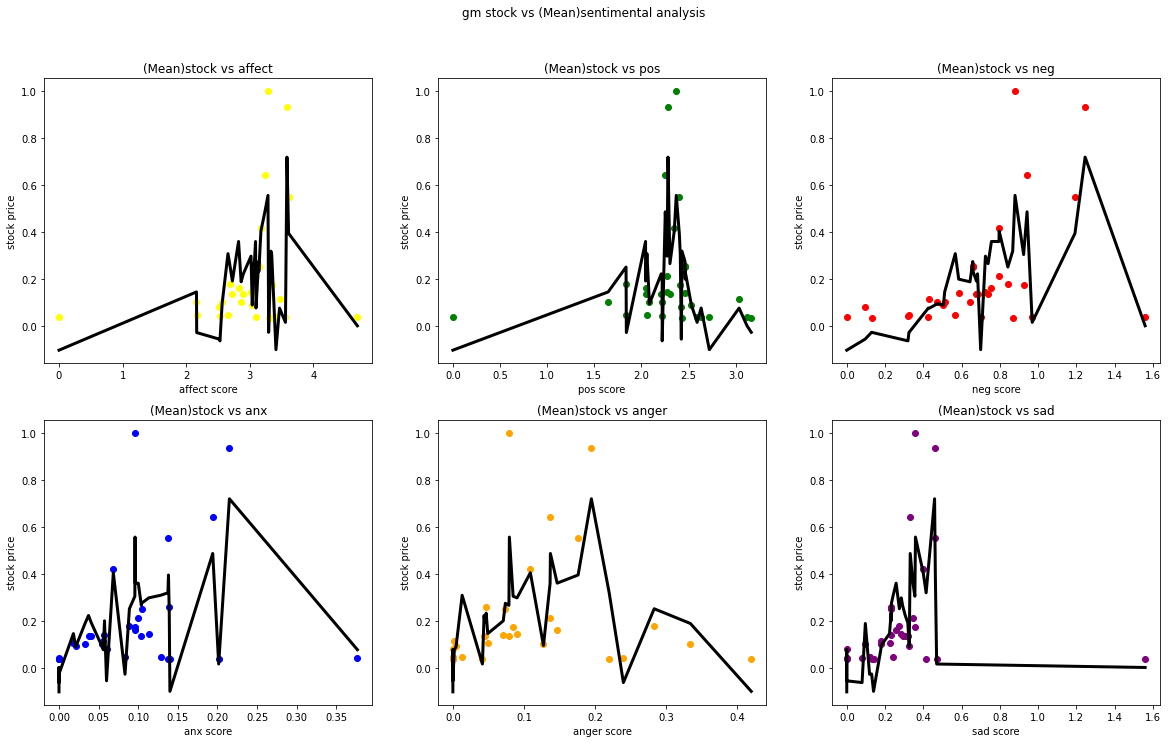

In [22]:
#plot gm
#In this part, it is plotting the data with the stock + the model itself
#Mean sentimental analysis
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Mean)sentimental analysis')
fig.set_size_inches(20,10)

gm_sort_affect_mean = gm_merge_pred_mean.sort_values(by=['affect'])
axs[0,0].scatter(gm_sort_affect_mean[['affect']],gm_sort_affect_mean[['close']],color='yellow',label='affect')#Plotting the data
axs[0,0].plot(gm_sort_affect_mean[['affect']], gm_sort_affect_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('(Mean)stock vs affect')
axs[0,0].set(xlabel='affect score', ylabel='stock price')

gm_sort_pos_mean = gm_merge_pred_mean.sort_values(by=['pos'])
axs[0,1].scatter(gm_sort_pos_mean[['pos']],gm_sort_pos_mean[['close']],color='green',label='pos')#Plotting the data
axs[0,1].plot(gm_sort_pos_mean[['pos']], gm_sort_pos_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(Mean)stock vs pos')
axs[0,1].set(xlabel='pos score', ylabel='stock price')

gm_sort_neg_mean = gm_merge_pred_mean.sort_values(by=['neg'])
axs[0,2].scatter(gm_sort_neg_mean[['neg']],gm_sort_neg_mean[['close']],color='red',label='neg') #Plotting the data
axs[0,2].plot(gm_sort_neg_mean[['neg']], gm_sort_neg_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('(Mean)stock vs neg')
axs[0,2].set(xlabel='neg score', ylabel='stock price')

gm_sort_anx_mean = gm_merge_pred_mean.sort_values(by=['anx'])
axs[1,0].scatter(gm_sort_anx_mean[['anx']],gm_sort_anx_mean[['close']],color='blue',label='anx') #Plotting the data
axs[1,0].plot(gm_sort_anx_mean[['anx']], gm_sort_anx_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,0].set_title('(Mean)stock vs anx')
axs[1,0].set(xlabel='anx score', ylabel='stock price')

gm_sort_anger_mean = gm_merge_pred_mean.sort_values(by=['anger'])
axs[1,1].scatter(gm_sort_anger_mean[['anger']],gm_sort_anger_mean[['close']],color='orange',label='anger') #Plotting the data
axs[1,1].plot(gm_sort_anger_mean[['anger']], gm_sort_anger_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,1].set_title('(Mean)stock vs anger')
axs[1,1].set(xlabel='anger score', ylabel='stock price')

gm_sort_sad_mean = gm_merge_pred_mean.sort_values(by=['sad'])
axs[1,2].scatter(gm_sort_sad_mean[['sad']],gm_sort_sad_mean[['close']],color='purple',label='sad') #Plotting the data
axs[1,2].plot(gm_sort_sad_mean[['sad']], gm_sort_sad_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,2].set_title('(Mean)stock vs sad')
axs[1,2].set(xlabel='sad score', ylabel='stock price')

plt.show()

In [ ]:
#Median sentimental analysis

In [ ]:
#std sentimental analysis

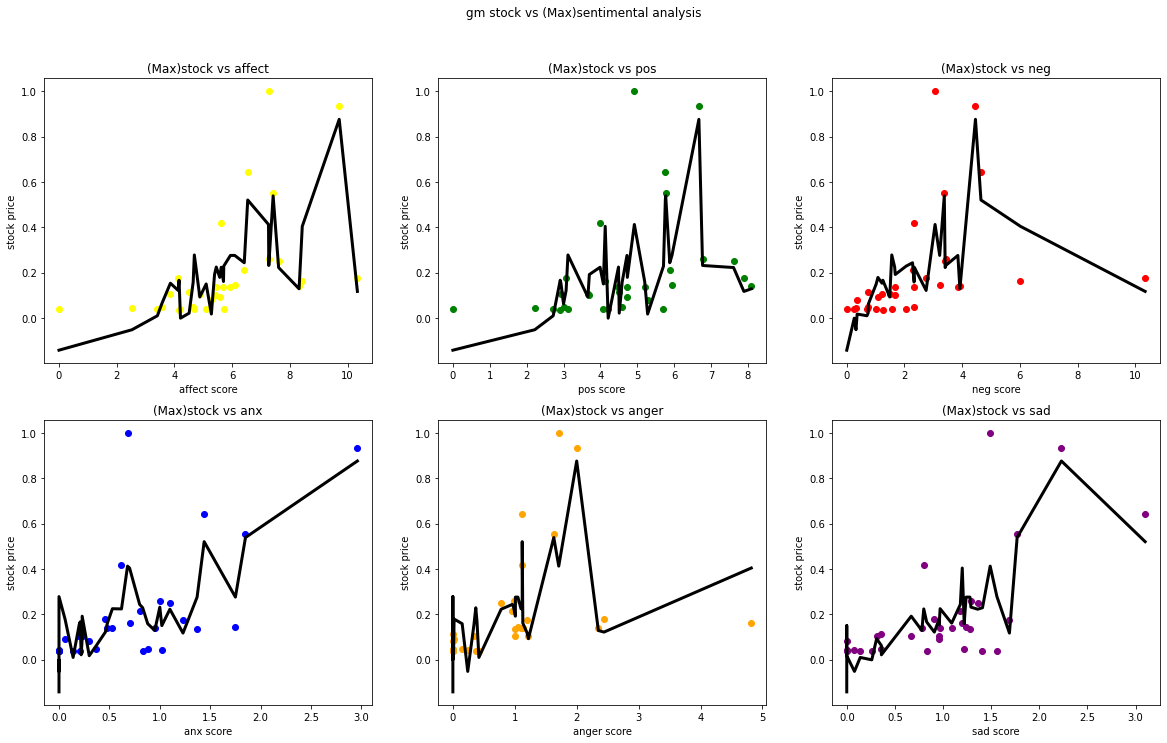

In [23]:
#Max sentimental analysis
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Max)sentimental analysis')
fig.set_size_inches(20,10)

gm_sort_affect_max = gm_merge_pred_max.sort_values(by=['affect'])
axs[0,0].scatter(gm_sort_affect_max[['affect']],gm_sort_affect_max[['close']],color='yellow',label='affect')#Plotting the data
axs[0,0].plot(gm_sort_affect_max[['affect']], gm_sort_affect_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('(Max)stock vs affect')
axs[0,0].set(xlabel='affect score', ylabel='stock price')

gm_sort_pos_max = gm_merge_pred_max.sort_values(by=['pos'])
axs[0,1].scatter(gm_sort_pos_max[['pos']],gm_sort_pos_max[['close']],color='green',label='pos')#Plotting the data
axs[0,1].plot(gm_sort_pos_max[['pos']], gm_sort_pos_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(Max)stock vs pos')
axs[0,1].set(xlabel='pos score', ylabel='stock price')

gm_sort_neg_max = gm_merge_pred_max.sort_values(by=['neg'])
axs[0,2].scatter(gm_sort_neg_max[['neg']],gm_sort_neg_max[['close']],color='red',label='neg') #Plotting the data
axs[0,2].plot(gm_sort_neg_max[['neg']], gm_sort_neg_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('(Max)stock vs neg')
axs[0,2].set(xlabel='neg score', ylabel='stock price')

gm_sort_anx_max = gm_merge_pred_max.sort_values(by=['anx'])
axs[1,0].scatter(gm_sort_anx_max[['anx']],gm_sort_anx_max[['close']],color='blue',label='anx') #Plotting the data
axs[1,0].plot(gm_sort_anx_max[['anx']], gm_sort_anx_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,0].set_title('(Max)stock vs anx')
axs[1,0].set(xlabel='anx score', ylabel='stock price')

gm_sort_anger_max = gm_merge_pred_max.sort_values(by=['anger'])
axs[1,1].scatter(gm_sort_anger_max[['anger']],gm_sort_anger_max[['close']],color='orange',label='anger') #Plotting the data
axs[1,1].plot(gm_sort_anger_max[['anger']], gm_sort_anger_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,1].set_title('(Max)stock vs anger')
axs[1,1].set(xlabel='anger score', ylabel='stock price')

gm_sort_sad_max = gm_merge_pred_max.sort_values(by=['sad'])
axs[1,2].scatter(gm_sort_sad_max[['sad']],gm_sort_sad_max[['close']],color='purple',label='sad') #Plotting the data
axs[1,2].plot(gm_sort_sad_max[['sad']], gm_sort_sad_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,2].set_title('(Max)stock vs sad')
axs[1,2].set(xlabel='sad score', ylabel='stock price')

plt.show()

In [ ]:
#Min sentimental analysis

# Plot data against time

Plotting gm stock with mean sentimental analysis

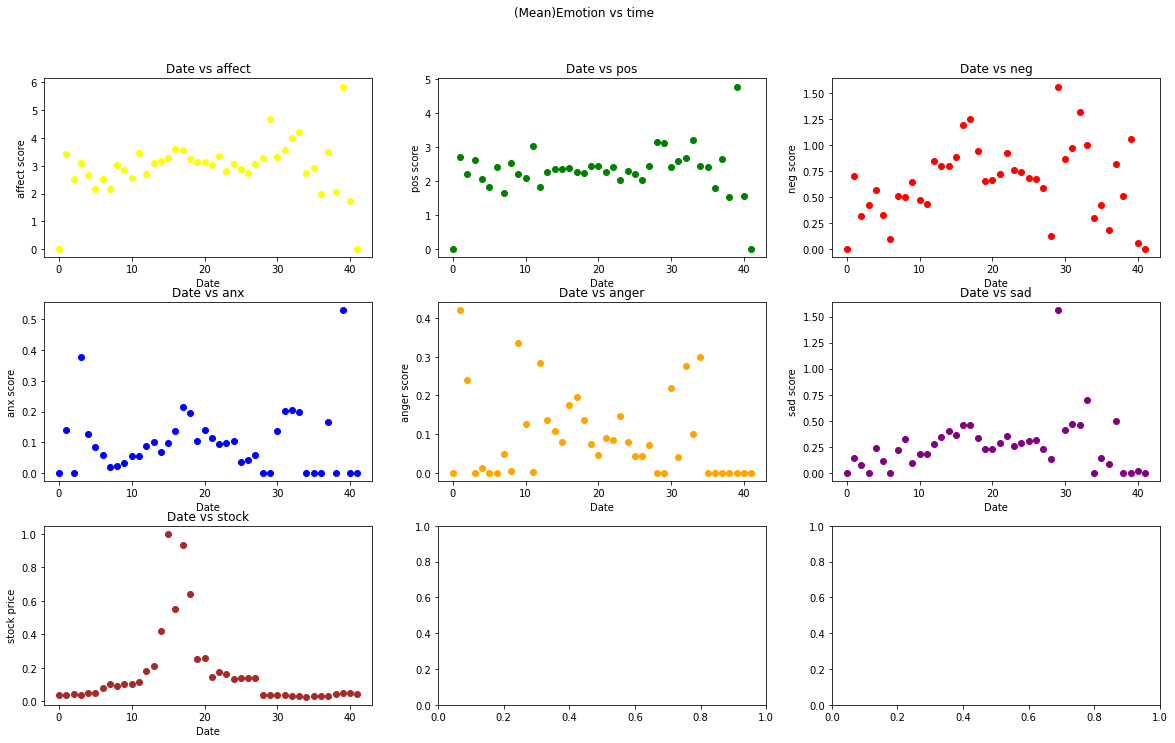

In [24]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Mean)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_affect_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_affect_mean.shape[0])],gm_sort_affect_mean[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

gm_sort_pos_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_pos_mean.shape[0])],gm_sort_pos_mean[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

gm_sort_neg_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_neg_mean.shape[0])],gm_sort_neg_mean[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

gm_sort_anx_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_anx_mean.shape[0])],gm_sort_anx_mean[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

gm_sort_anger_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_anger_mean.shape[0])],gm_sort_anger_mean[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

gm_sort_sad_mean = gm_merge_df_mean.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(gm_sort_sad_mean.shape[0])],gm_sort_sad_mean[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

gm_sort_date = gm_merge_df_mean.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting gm stock with median sentimental analysis

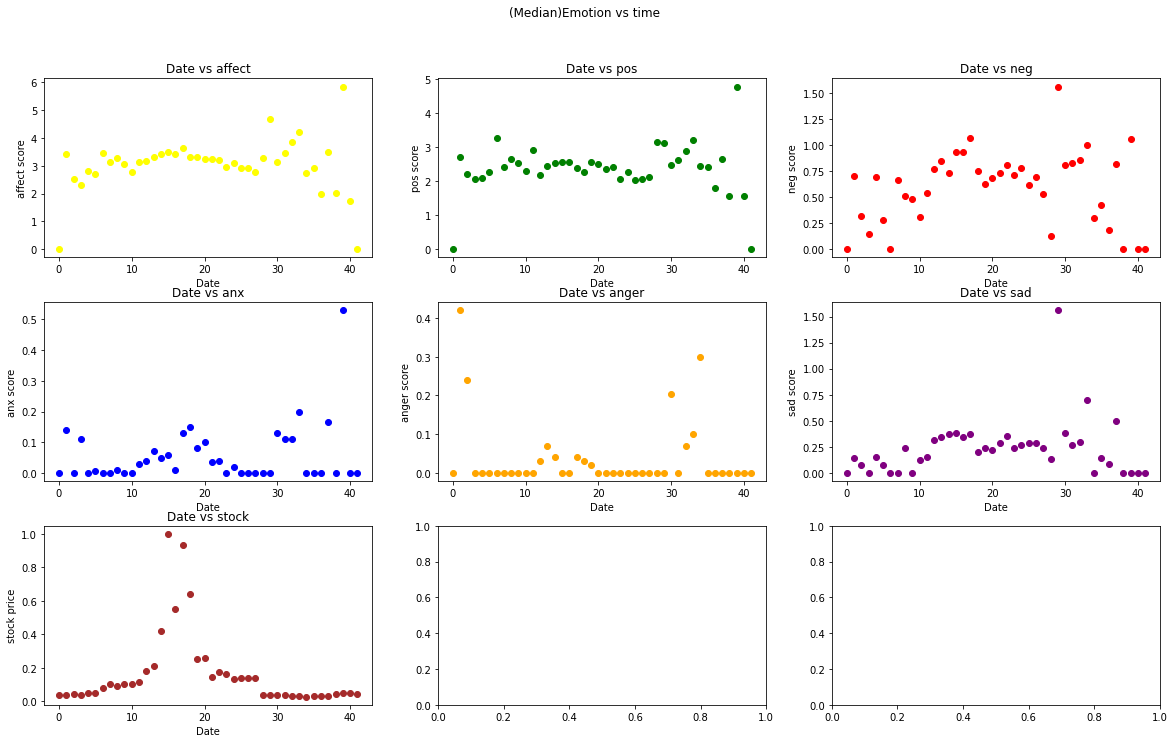

In [25]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Median)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_affect_median = gm_merge_df_median.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_affect_median.shape[0])],gm_sort_affect_median[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

gm_sort_pos_median = gm_merge_df_median.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_pos_median.shape[0])],gm_sort_pos_median[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

gm_sort_neg_median = gm_merge_df_median.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_neg_median.shape[0])],gm_sort_neg_median[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

gm_sort_anx_median = gm_merge_df_median.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_anx_median.shape[0])],gm_sort_anx_median[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

gm_sort_anger_median = gm_merge_df_median.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_anger_median.shape[0])],gm_sort_anger_median[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

gm_sort_sad_median = gm_merge_df_median.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(gm_sort_sad_median.shape[0])],gm_sort_sad_median[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

gm_sort_date = gm_merge_df_median.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting gm stock with std sentimental analysis

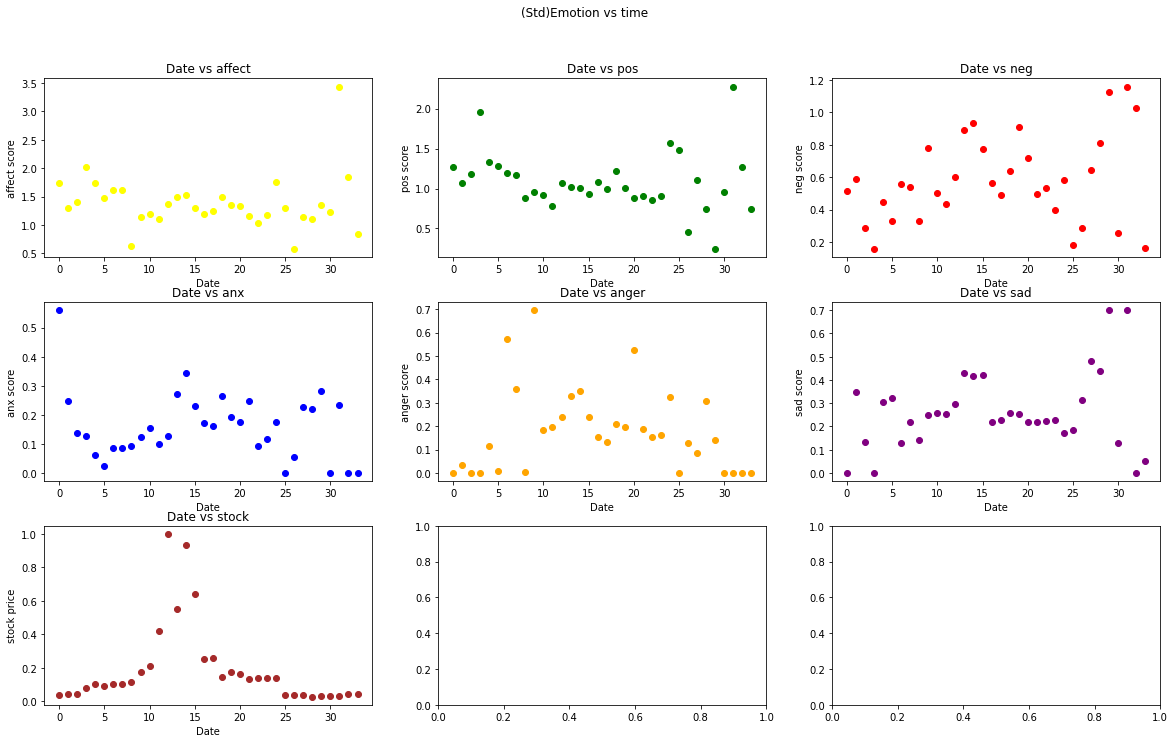

In [26]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Std)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_affect_std = gm_merge_df_std.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_affect_std.shape[0])],gm_sort_affect_std[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

gm_sort_pos_std = gm_merge_df_std.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_pos_std.shape[0])],gm_sort_pos_std[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

gm_sort_neg_std = gm_merge_df_std.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_neg_std.shape[0])],gm_sort_neg_std[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

gm_sort_anx_std = gm_merge_df_std.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_anx_std.shape[0])],gm_sort_anx_std[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

gm_sort_anger_std = gm_merge_df_std.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_anger_std.shape[0])],gm_sort_anger_std[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

gm_sort_sad_std = gm_merge_df_std.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(gm_sort_sad_std.shape[0])],gm_sort_sad_std[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

gm_sort_date = gm_merge_df_std.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting gm stock with maximum sentimental analysis

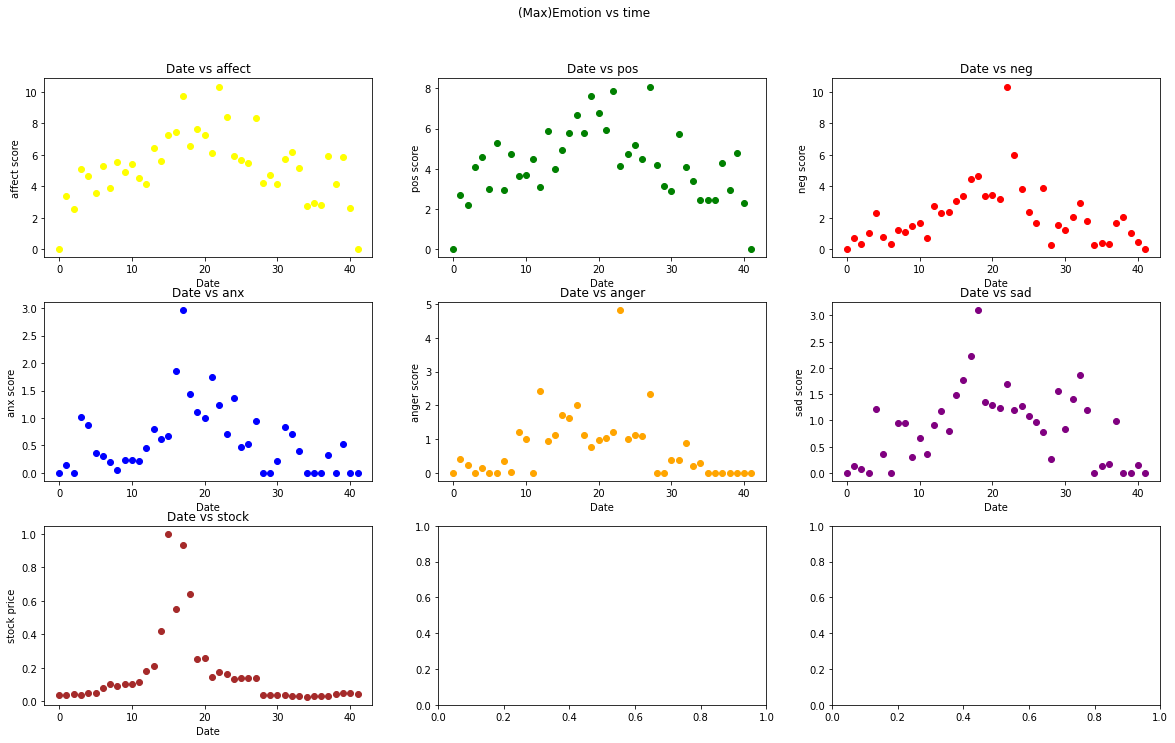

In [27]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Max)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_affect_max = gm_merge_df_max.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_affect_max.shape[0])],gm_sort_affect_max[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

gm_sort_pos_max = gm_merge_df_max.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_pos_max.shape[0])],gm_sort_pos_max[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

gm_sort_neg_max = gm_merge_df_max.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_neg_max.shape[0])],gm_sort_neg_max[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

gm_sort_anx_max = gm_merge_df_max.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_anx_max.shape[0])],gm_sort_anx_max[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

gm_sort_anger_max = gm_merge_df_max.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_anger_max.shape[0])],gm_sort_anger_max[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

gm_sort_sad_max = gm_merge_df_max.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(gm_sort_sad_max.shape[0])],gm_sort_sad_max[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

gm_sort_date = gm_merge_df_max.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting gm stock with minimum sentimental analysis

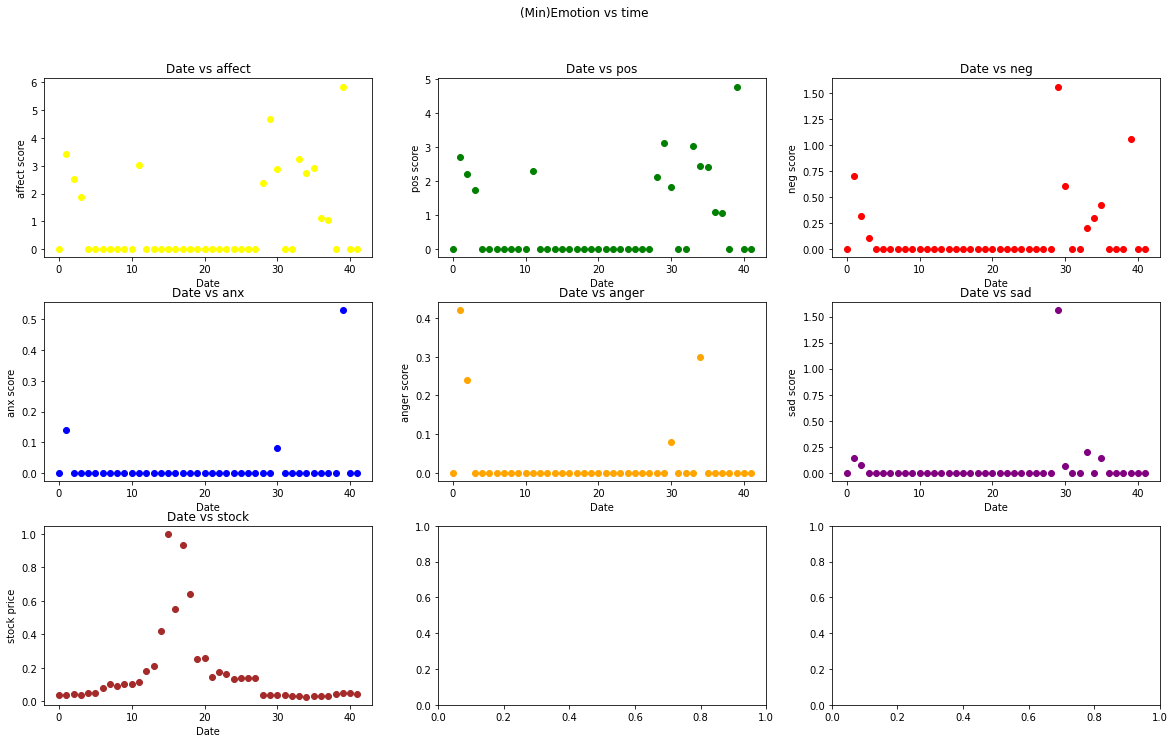

In [28]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Min)Emotion vs time')
fig.set_size_inches(20,10)

gm_sort_affect_min = gm_merge_df_min.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(gm_sort_affect_min.shape[0])],gm_sort_affect_min[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

gm_sort_pos_min = gm_merge_df_min.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(gm_sort_pos_min.shape[0])],gm_sort_pos_min[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

gm_sort_neg_min = gm_merge_df_min.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(gm_sort_neg_min.shape[0])],gm_sort_neg_min[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

gm_sort_anx_min = gm_merge_df_min.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(gm_sort_anx_min.shape[0])],gm_sort_anx_min[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

gm_sort_anger_min = gm_merge_df_min.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(gm_sort_anger_min.shape[0])],gm_sort_anger_min[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

gm_sort_sad_min = gm_merge_df_min.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(gm_sort_sad_min.shape[0])],gm_sort_sad_min[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

gm_sort_date = gm_merge_df_min.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(gm_sort_date.shape[0])],gm_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

# Training with different method

Training with mean sentimental analysis

In [29]:
#Training models based on the gm data for four features(affect,neg,pos,anx,anger,sad) separately
reg_gm_affect_mean = LinearRegression().fit(gm_merge_df_mean[['affect']][:-10], gm_merge_df_mean[['close']][:-10])
reg_gm_pos_mean = LinearRegression().fit(gm_merge_df_mean[['pos']][:-10], gm_merge_df_mean[['close']][:-10])
reg_gm_neg_mean = LinearRegression().fit(gm_merge_df_mean[['neg']][:-10], gm_merge_df_mean[['close']][:-10])
reg_gm_anx_mean = LinearRegression().fit(gm_merge_df_mean[['anx']][:-10], gm_merge_df_mean[['close']][:-10])
reg_gm_anger_mean = LinearRegression().fit(gm_merge_df_mean[['anger']][:-10], gm_merge_df_mean[['close']][:-10])
reg_gm_sad_mean = LinearRegression().fit(gm_merge_df_mean[['sad']][:-10], gm_merge_df_mean[['close']][:-10])

In [30]:
#predict the stock price of gm using new models
pred_gm_affect_mean = reg_gm_affect_mean.predict(gm_merge_df_mean[['affect']][-10:])
pred_gm_pos_mean = reg_gm_pos_mean.predict(gm_merge_df_mean[['pos']][-10:])
pred_gm_neg_mean = reg_gm_neg_mean.predict(gm_merge_df_mean[['neg']][-10:])
pred_gm_anx_mean = reg_gm_anx_mean.predict(gm_merge_df_mean[['anx']][-10:])
pred_gm_anger_mean = reg_gm_anger_mean.predict(gm_merge_df_mean[['anger']][-10:])
pred_gm_sad_mean = reg_gm_sad_mean.predict(gm_merge_df_mean[['sad']][-10:])

#predict on the training model to plot the data
train_gm_affect_mean = reg_gm_affect_mean.predict(gm_merge_df_mean[['affect']][:-10])
train_gm_pos_mean = reg_gm_pos_mean.predict(gm_merge_df_mean[['pos']][:-10])
train_gm_neg_mean = reg_gm_neg_mean.predict(gm_merge_df_mean[['neg']][:-10])
train_gm_anx_mean = reg_gm_anx_mean.predict(gm_merge_df_mean[['anx']][:-10])
train_gm_anger_mean = reg_gm_anger_mean.predict(gm_merge_df_mean[['anger']][:-10])
train_gm_sad_mean = reg_gm_sad_mean.predict(gm_merge_df_mean[['sad']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_mean = pd.concat([gm_merge_df_mean[:-10], pd.DataFrame(train_gm_affect_mean,columns=['pred_affect'])], axis=1)
gm_merge_pred1_mean = pd.concat([gm_merge_pred1_mean, pd.DataFrame(train_gm_pos_mean,columns=['pred_pos'])], axis=1)
gm_merge_pred1_mean = pd.concat([gm_merge_pred1_mean, pd.DataFrame(train_gm_neg_mean,columns=['pred_neg'])], axis=1)
gm_merge_pred1_mean = pd.concat([gm_merge_pred1_mean, pd.DataFrame(train_gm_anx_mean,columns=['pred_anx'])], axis=1)
gm_merge_pred1_mean = pd.concat([gm_merge_pred1_mean, pd.DataFrame(train_gm_anger_mean,columns=['pred_anger'])], axis=1)
gm_merge_pred1_mean = pd.concat([gm_merge_pred1_mean, pd.DataFrame(train_gm_sad_mean,columns=['pred_sad'])], axis=1)

#gm_merge_pred1_mean

In [31]:
gm_score_affect_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_affect_mean)
gm_score_pos_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_pos_mean)
gm_score_neg_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_neg_mean)
gm_score_anx_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_anx_mean)
gm_score_anger_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_anger_mean)
gm_score_sad_mean = mean_squared_error(gm_merge_df_mean[['close']][-10:], pred_gm_sad_mean)
[gm_score_affect_mean,gm_score_pos_mean,gm_score_neg_mean,gm_score_anx_mean,gm_score_anger_mean,gm_score_sad_mean]

[0.042892449322335574,
 0.027866139621698836,
 0.04039744361225668,
 0.05325340669592192,
 0.025617863141606818,
 0.024408814391489696]

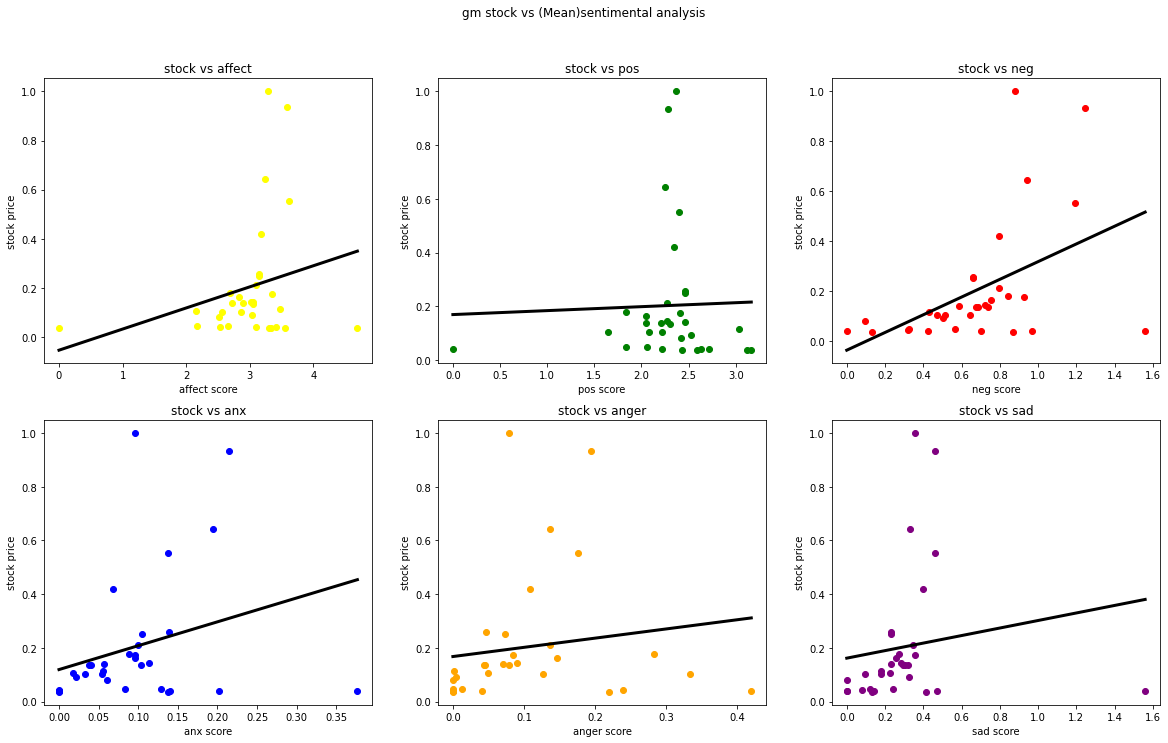

In [32]:
#plot the new gm model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Mean)sentimental analysis')
fig.set_size_inches(20,10)

gm_sort_affect_mean = gm_merge_pred1_mean.sort_values(by=['affect'])
axs[0,0].scatter(gm_sort_affect_mean[['affect']],gm_sort_affect_mean[['close']],color='yellow',label='affect')#Plotting the data
axs[0,0].plot(gm_sort_affect_mean[['affect']], gm_sort_affect_mean[['pred_affect']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('stock vs affect')
axs[0,0].set(xlabel='affect score', ylabel='stock price')

gm_sort_pos_mean = gm_merge_pred1_mean.sort_values(by=['pos'])
axs[0,1].scatter(gm_sort_pos_mean[['pos']],gm_sort_pos_mean[['close']],color='green',label='pos')#Plotting the data
axs[0,1].plot(gm_sort_pos_mean[['pos']], gm_sort_pos_mean[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs pos')
axs[0,1].set(xlabel='pos score', ylabel='stock price')

gm_sort_neg_mean = gm_merge_pred1_mean.sort_values(by=['neg'])
axs[0,2].scatter(gm_sort_neg_mean[['neg']],gm_sort_neg_mean[['close']],color='red',label='neg') #Plotting the data
axs[0,2].plot(gm_sort_neg_mean[['neg']], gm_sort_neg_mean[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('stock vs neg')
axs[0,2].set(xlabel='neg score', ylabel='stock price')

gm_sort_anx_mean = gm_merge_pred1_mean.sort_values(by=['anx'])
axs[1,0].scatter(gm_sort_anx_mean[['anx']],gm_sort_anx_mean[['close']],color='blue',label='anx')#Plotting the data
axs[1,0].plot(gm_sort_anx_mean[['anx']], gm_sort_anx_mean[['pred_anx']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs anx')
axs[1,0].set(xlabel='anx score', ylabel='stock price')

gm_sort_anger_mean = gm_merge_pred1_mean.sort_values(by=['anger'])
axs[1,1].scatter(gm_sort_anger_mean[['anger']],gm_sort_anger_mean[['close']],color='orange',label='anger')#Plotting the data
axs[1,1].plot(gm_sort_anger_mean[['anger']], gm_sort_anger_mean[['pred_anger']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs anger')
axs[1,1].set(xlabel='anger score', ylabel='stock price')

gm_sort_sad_mean = gm_merge_pred1_mean.sort_values(by=['sad'])
axs[1,2].scatter(gm_sort_sad_mean[['sad']],gm_sort_sad_mean[['close']],color='purple',label='sad')#Plotting the data
axs[1,2].plot(gm_sort_sad_mean[['sad']], gm_sort_sad_mean[['pred_sad']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,2].set_title('stock vs sad')
axs[1,2].set(xlabel='sad score', ylabel='stock price')

plt.show()

Training with median sentimental analysis

In [33]:
#Training models based on the gm data for four features(affect,neg,pos,anx,anger,sad) separately
reg_gm_affect_median = LinearRegression().fit(gm_merge_df_median[['affect']][:-10], gm_merge_df_median[['close']][:-10])
reg_gm_pos_median = LinearRegression().fit(gm_merge_df_median[['pos']][:-10], gm_merge_df_median[['close']][:-10])
reg_gm_neg_median = LinearRegression().fit(gm_merge_df_median[['neg']][:-10], gm_merge_df_median[['close']][:-10])
reg_gm_anx_median = LinearRegression().fit(gm_merge_df_median[['anx']][:-10], gm_merge_df_median[['close']][:-10])
reg_gm_anger_median = LinearRegression().fit(gm_merge_df_median[['anger']][:-10], gm_merge_df_median[['close']][:-10])
reg_gm_sad_median = LinearRegression().fit(gm_merge_df_median[['sad']][:-10], gm_merge_df_median[['close']][:-10])

In [34]:
#predict the stock price of gm using new models
pred_gm_affect_median = reg_gm_affect_median.predict(gm_merge_df_median[['affect']][-10:])
pred_gm_pos_median = reg_gm_pos_median.predict(gm_merge_df_median[['pos']][-10:])
pred_gm_neg_median = reg_gm_neg_median.predict(gm_merge_df_median[['neg']][-10:])
pred_gm_anx_median = reg_gm_anx_median.predict(gm_merge_df_median[['anx']][-10:])
pred_gm_anger_median = reg_gm_anger_median.predict(gm_merge_df_median[['anger']][-10:])
pred_gm_sad_median = reg_gm_sad_median.predict(gm_merge_df_median[['sad']][-10:])

#predict on the training model to plot the data
train_gm_affect_median = reg_gm_affect_median.predict(gm_merge_df_median[['affect']][:-10])
train_gm_pos_median = reg_gm_pos_median.predict(gm_merge_df_median[['pos']][:-10])
train_gm_neg_median = reg_gm_neg_median.predict(gm_merge_df_median[['neg']][:-10])
train_gm_anx_median = reg_gm_anx_median.predict(gm_merge_df_median[['anx']][:-10])
train_gm_anger_median = reg_gm_anger_median.predict(gm_merge_df_median[['anger']][:-10])
train_gm_sad_median = reg_gm_sad_median.predict(gm_merge_df_median[['sad']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_median = pd.concat([gm_merge_df_median[:-10], pd.DataFrame(train_gm_affect_median,columns=['pred_affect'])], axis=1)
gm_merge_pred1_median = pd.concat([gm_merge_pred1_median, pd.DataFrame(train_gm_pos_median,columns=['pred_pos'])], axis=1)
gm_merge_pred1_median = pd.concat([gm_merge_pred1_median, pd.DataFrame(train_gm_neg_median,columns=['pred_neg'])], axis=1)
gm_merge_pred1_median = pd.concat([gm_merge_pred1_median, pd.DataFrame(train_gm_anx_median,columns=['pred_anx'])], axis=1)
gm_merge_pred1_median = pd.concat([gm_merge_pred1_median, pd.DataFrame(train_gm_anger_median,columns=['pred_anger'])], axis=1)
gm_merge_pred1_median = pd.concat([gm_merge_pred1_median, pd.DataFrame(train_gm_sad_median,columns=['pred_sad'])], axis=1)

# gm_merge_pred1_median

In [35]:
gm_score_affect_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_affect_median)
gm_score_pos_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_pos_median)
gm_score_neg_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_neg_median)
gm_score_anx_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_anx_median)
gm_score_anger_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_anger_median)
gm_score_sad_median = mean_squared_error(gm_merge_df_median[['close']][-10:], pred_gm_sad_median)
[gm_score_affect_median,gm_score_pos_median,gm_score_neg_median,gm_score_anx_median,gm_score_anger_median,gm_score_sad_median]

[0.043129148986665575,
 0.028308486392358743,
 0.030283239938033956,
 0.15824854162477878,
 0.026655260364142657,
 0.0253712971434209]

In [ ]:
#plot the new gm model

Training with std sentimental analysis

In [36]:
#Training models based on the gm data for four features(affect,neg,pos,anx,anger,sad) separately
reg_gm_affect_std = LinearRegression().fit(gm_merge_df_std[['affect']][:-10], gm_merge_df_std[['close']][:-10])
reg_gm_pos_std = LinearRegression().fit(gm_merge_df_std[['pos']][:-10], gm_merge_df_std[['close']][:-10])
reg_gm_neg_std = LinearRegression().fit(gm_merge_df_std[['neg']][:-10], gm_merge_df_std[['close']][:-10])
reg_gm_anx_std = LinearRegression().fit(gm_merge_df_std[['anx']][:-10], gm_merge_df_std[['close']][:-10])
reg_gm_anger_std = LinearRegression().fit(gm_merge_df_std[['anger']][:-10], gm_merge_df_std[['close']][:-10])
reg_gm_sad_std = LinearRegression().fit(gm_merge_df_std[['sad']][:-10], gm_merge_df_std[['close']][:-10])

In [37]:
#predict the stock price of gm using new models
pred_gm_affect_std = reg_gm_affect_std.predict(gm_merge_df_std[['affect']][-10:])
pred_gm_pos_std = reg_gm_pos_std.predict(gm_merge_df_std[['pos']][-10:])
pred_gm_neg_std = reg_gm_neg_std.predict(gm_merge_df_std[['neg']][-10:])
pred_gm_anx_std = reg_gm_anx_std.predict(gm_merge_df_std[['anx']][-10:])
pred_gm_anger_std = reg_gm_anger_std.predict(gm_merge_df_std[['anger']][-10:])
pred_gm_sad_std = reg_gm_sad_std.predict(gm_merge_df_std[['sad']][-10:])

#predict on the training model to plot the data
train_gm_affect_std = reg_gm_affect_std.predict(gm_merge_df_std[['affect']][:-10])
train_gm_pos_std = reg_gm_pos_std.predict(gm_merge_df_std[['pos']][:-10])
train_gm_neg_std = reg_gm_neg_std.predict(gm_merge_df_std[['neg']][:-10])
train_gm_anx_std = reg_gm_anx_std.predict(gm_merge_df_std[['anx']][:-10])
train_gm_anger_std = reg_gm_anger_std.predict(gm_merge_df_std[['anger']][:-10])
train_gm_sad_std = reg_gm_sad_std.predict(gm_merge_df_std[['sad']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_std = pd.concat([gm_merge_df_std[:-10], pd.DataFrame(train_gm_affect_std,columns=['pred_affect'])], axis=1)
gm_merge_pred1_std = pd.concat([gm_merge_pred1_std, pd.DataFrame(train_gm_pos_std,columns=['pred_pos'])], axis=1)
gm_merge_pred1_std = pd.concat([gm_merge_pred1_std, pd.DataFrame(train_gm_neg_std,columns=['pred_neg'])], axis=1)
gm_merge_pred1_std = pd.concat([gm_merge_pred1_std, pd.DataFrame(train_gm_anx_std,columns=['pred_anx'])], axis=1)
gm_merge_pred1_std = pd.concat([gm_merge_pred1_std, pd.DataFrame(train_gm_anger_std,columns=['pred_anger'])], axis=1)
gm_merge_pred1_std = pd.concat([gm_merge_pred1_std, pd.DataFrame(train_gm_sad_std,columns=['pred_sad'])], axis=1)

#gm_merge_pred1_std

In [38]:
gm_score_affect_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_affect_std)
gm_score_pos_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_pos_std)
gm_score_neg_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_neg_std)
gm_score_anx_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_anx_std)
gm_score_anger_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_anger_std)
gm_score_sad_std = mean_squared_error(gm_merge_df_std[['close']][-10:], pred_gm_sad_std)
[gm_score_affect_std,gm_score_pos_std,gm_score_neg_std,gm_score_anx_std,gm_score_anger_std,gm_score_sad_std]

[0.04283774860340638,
 0.07062557872967457,
 0.133190045935461,
 0.03646188200131738,
 0.029364127375919195,
 0.2248864664418427]

In [ ]:
#plot the new gm model

Training with maximum sentimental analysis

In [39]:
#Training models based on the gm data for four features(affect,neg,pos,anx,anger,sad) separately
reg_gm_affect_max = LinearRegression().fit(gm_merge_df_max[['affect']][:-10], gm_merge_df_max[['close']][:-10])
reg_gm_pos_max = LinearRegression().fit(gm_merge_df_max[['pos']][:-10], gm_merge_df_max[['close']][:-10])
reg_gm_neg_max = LinearRegression().fit(gm_merge_df_max[['neg']][:-10], gm_merge_df_max[['close']][:-10])
reg_gm_anx_max = LinearRegression().fit(gm_merge_df_max[['anx']][:-10], gm_merge_df_max[['close']][:-10])
reg_gm_anger_max = LinearRegression().fit(gm_merge_df_max[['anger']][:-10], gm_merge_df_max[['close']][:-10])
reg_gm_sad_max = LinearRegression().fit(gm_merge_df_max[['sad']][:-10], gm_merge_df_max[['close']][:-10])

In [40]:
#predict the stock price of gm using new models
pred_gm_affect_max = reg_gm_affect_max.predict(gm_merge_df_max[['affect']][-10:])
pred_gm_pos_max = reg_gm_pos_max.predict(gm_merge_df_max[['pos']][-10:])
pred_gm_neg_max = reg_gm_neg_max.predict(gm_merge_df_max[['neg']][-10:])
pred_gm_anx_max = reg_gm_anx_max.predict(gm_merge_df_max[['anx']][-10:])
pred_gm_anger_max = reg_gm_anger_max.predict(gm_merge_df_max[['anger']][-10:])
pred_gm_sad_max = reg_gm_sad_max.predict(gm_merge_df_max[['sad']][-10:])

#predict on the training model to plot the data
train_gm_affect_max = reg_gm_affect_max.predict(gm_merge_df_max[['affect']][:-10])
train_gm_pos_max = reg_gm_pos_max.predict(gm_merge_df_max[['pos']][:-10])
train_gm_neg_max = reg_gm_neg_max.predict(gm_merge_df_max[['neg']][:-10])
train_gm_anx_max = reg_gm_anx_max.predict(gm_merge_df_max[['anx']][:-10])
train_gm_anger_max = reg_gm_anger_max.predict(gm_merge_df_max[['anger']][:-10])
train_gm_sad_max = reg_gm_sad_max.predict(gm_merge_df_max[['sad']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_max = pd.concat([gm_merge_df_max[:-10], pd.DataFrame(train_gm_affect_max,columns=['pred_affect'])], axis=1)
gm_merge_pred1_max = pd.concat([gm_merge_pred1_max, pd.DataFrame(train_gm_pos_max,columns=['pred_pos'])], axis=1)
gm_merge_pred1_max = pd.concat([gm_merge_pred1_max, pd.DataFrame(train_gm_neg_max,columns=['pred_neg'])], axis=1)
gm_merge_pred1_max = pd.concat([gm_merge_pred1_max, pd.DataFrame(train_gm_anx_max,columns=['pred_anx'])], axis=1)
gm_merge_pred1_max = pd.concat([gm_merge_pred1_max, pd.DataFrame(train_gm_anger_max,columns=['pred_anger'])], axis=1)
gm_merge_pred1_max = pd.concat([gm_merge_pred1_max, pd.DataFrame(train_gm_sad_max,columns=['pred_sad'])], axis=1)

#gm_merge_pred1_max

In [41]:
gm_score_affect_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_affect_max)
gm_score_pos_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_pos_max)
gm_score_neg_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_neg_max)
gm_score_anx_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_anx_max)
gm_score_anger_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_anger_max)
gm_score_sad_max = mean_squared_error(gm_merge_df_max[['close']][-10:], pred_gm_sad_max)
[gm_score_affect_max,gm_score_pos_max,gm_score_neg_max,gm_score_anx_max,gm_score_anger_max,gm_score_sad_max]

[0.01744250231405575,
 0.010528621880962066,
 0.012840393721047033,
 0.005951461924270803,
 0.008992680210839838,
 0.023704070789848337]

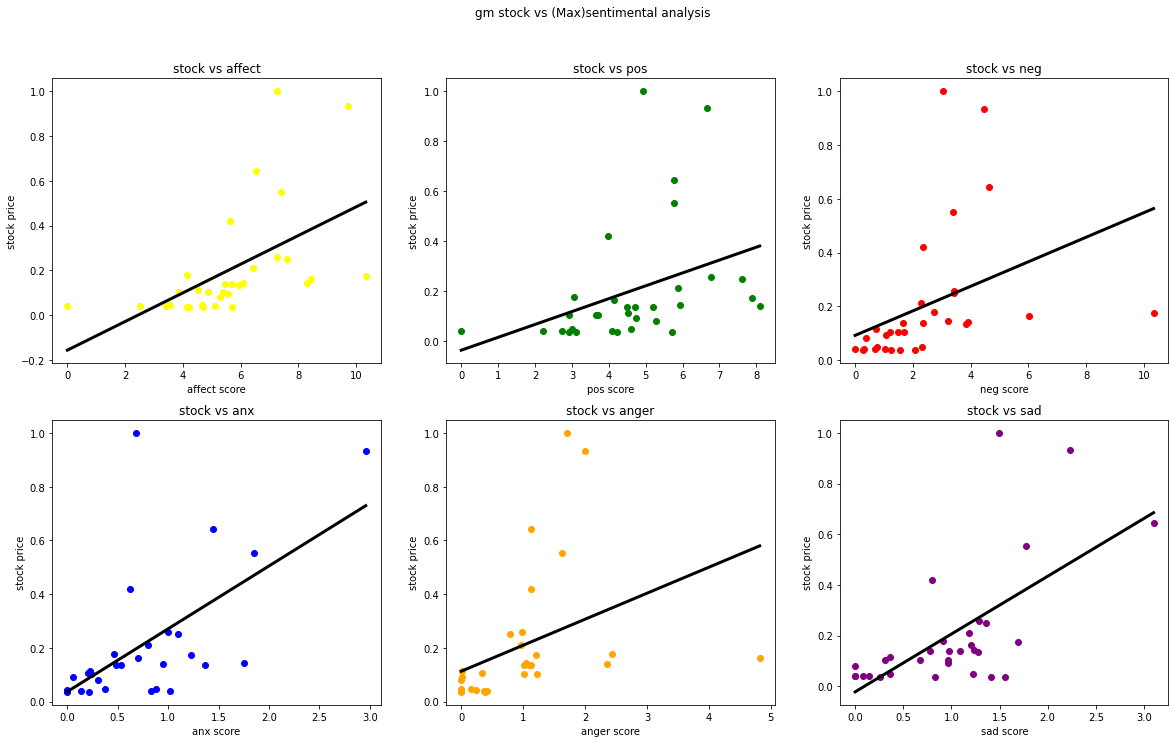

In [42]:
#plot the new gm model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('gm stock vs (Max)sentimental analysis')
fig.set_size_inches(20,10)

gm_sort_affect_max = gm_merge_pred1_max.sort_values(by=['affect'])
axs[0,0].scatter(gm_sort_affect_max[['affect']],gm_sort_affect_max[['close']],color='yellow',label='affect')#Plotting the data
axs[0,0].plot(gm_sort_affect_max[['affect']], gm_sort_affect_max[['pred_affect']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('stock vs affect')
axs[0,0].set(xlabel='affect score', ylabel='stock price')

gm_sort_pos_max = gm_merge_pred1_max.sort_values(by=['pos'])
axs[0,1].scatter(gm_sort_pos_max[['pos']],gm_sort_pos_max[['close']],color='green',label='pos')#Plotting the data
axs[0,1].plot(gm_sort_pos_max[['pos']], gm_sort_pos_max[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs pos')
axs[0,1].set(xlabel='pos score', ylabel='stock price')

gm_sort_neg_max = gm_merge_pred1_max.sort_values(by=['neg'])
axs[0,2].scatter(gm_sort_neg_max[['neg']],gm_sort_neg_max[['close']],color='red',label='neg') #Plotting the data
axs[0,2].plot(gm_sort_neg_max[['neg']], gm_sort_neg_max[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('stock vs neg')
axs[0,2].set(xlabel='neg score', ylabel='stock price')

gm_sort_anx_max = gm_merge_pred1_max.sort_values(by=['anx'])
axs[1,0].scatter(gm_sort_anx_max[['anx']],gm_sort_anx_max[['close']],color='blue',label='anx')#Plotting the data
axs[1,0].plot(gm_sort_anx_max[['anx']], gm_sort_anx_max[['pred_anx']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs anx')
axs[1,0].set(xlabel='anx score', ylabel='stock price')

gm_sort_anger_max = gm_merge_pred1_max.sort_values(by=['anger'])
axs[1,1].scatter(gm_sort_anger_max[['anger']],gm_sort_anger_max[['close']],color='orange',label='anger')#Plotting the data
axs[1,1].plot(gm_sort_anger_max[['anger']], gm_sort_anger_max[['pred_anger']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs anger')
axs[1,1].set(xlabel='anger score', ylabel='stock price')

gm_sort_sad_max = gm_merge_pred1_max.sort_values(by=['sad'])
axs[1,2].scatter(gm_sort_sad_max[['sad']],gm_sort_sad_max[['close']],color='purple',label='sad')#Plotting the data
axs[1,2].plot(gm_sort_sad_max[['sad']], gm_sort_sad_max[['pred_sad']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,2].set_title('stock vs sad')
axs[1,2].set(xlabel='sad score', ylabel='stock price')

plt.show()

Training with minimum sentimental analysis

In [43]:
#Training models based on the gm data for four features(affect,neg,pos,anx,anger,sad) separately
reg_gm_affect_min = LinearRegression().fit(gm_merge_df_min[['affect']][:-10], gm_merge_df_min[['close']][:-10])
reg_gm_pos_min = LinearRegression().fit(gm_merge_df_min[['pos']][:-10], gm_merge_df_min[['close']][:-10])
reg_gm_neg_min = LinearRegression().fit(gm_merge_df_min[['neg']][:-10], gm_merge_df_min[['close']][:-10])
reg_gm_anx_min = LinearRegression().fit(gm_merge_df_min[['anx']][:-10], gm_merge_df_min[['close']][:-10])
reg_gm_anger_min = LinearRegression().fit(gm_merge_df_min[['anger']][:-10], gm_merge_df_min[['close']][:-10])
reg_gm_sad_min = LinearRegression().fit(gm_merge_df_min[['sad']][:-10], gm_merge_df_min[['close']][:-10])

In [44]:
#predict the stock price of gm using new models
pred_gm_affect_min = reg_gm_affect_min.predict(gm_merge_df_min[['affect']][-10:])
pred_gm_pos_min = reg_gm_pos_min.predict(gm_merge_df_min[['pos']][-10:])
pred_gm_neg_min = reg_gm_neg_min.predict(gm_merge_df_min[['neg']][-10:])
pred_gm_anx_min = reg_gm_anx_min.predict(gm_merge_df_min[['anx']][-10:])
pred_gm_anger_min = reg_gm_anger_min.predict(gm_merge_df_min[['anger']][-10:])
pred_gm_sad_min = reg_gm_sad_min.predict(gm_merge_df_min[['sad']][-10:])

#predict on the training model to plot the data
train_gm_affect_min = reg_gm_affect_min.predict(gm_merge_df_min[['affect']][:-10])
train_gm_pos_min = reg_gm_pos_min.predict(gm_merge_df_min[['pos']][:-10])
train_gm_neg_min = reg_gm_neg_min.predict(gm_merge_df_min[['neg']][:-10])
train_gm_anx_min = reg_gm_anx_min.predict(gm_merge_df_min[['anx']][:-10])
train_gm_anger_min = reg_gm_anger_min.predict(gm_merge_df_min[['anger']][:-10])
train_gm_sad_min = reg_gm_sad_min.predict(gm_merge_df_min[['sad']][:-10])

#combine five kinds of prediction for gm with original data
gm_merge_pred1_min = pd.concat([gm_merge_df_min[:-10], pd.DataFrame(train_gm_affect_min,columns=['pred_affect'])], axis=1)
gm_merge_pred1_min = pd.concat([gm_merge_pred1_min, pd.DataFrame(train_gm_pos_min,columns=['pred_pos'])], axis=1)
gm_merge_pred1_min = pd.concat([gm_merge_pred1_min, pd.DataFrame(train_gm_neg_min,columns=['pred_neg'])], axis=1)
gm_merge_pred1_min = pd.concat([gm_merge_pred1_min, pd.DataFrame(train_gm_anx_min,columns=['pred_anx'])], axis=1)
gm_merge_pred1_min = pd.concat([gm_merge_pred1_min, pd.DataFrame(train_gm_anger_min,columns=['pred_anger'])], axis=1)
gm_merge_pred1_min = pd.concat([gm_merge_pred1_min, pd.DataFrame(train_gm_sad_min,columns=['pred_sad'])], axis=1)

#gm_merge_pred1_min

In [45]:
gm_score_affect_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_affect_min)
gm_score_pos_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_pos_min)
gm_score_neg_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_neg_min)
gm_score_anx_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_anx_min)
gm_score_anger_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_anger_min)
gm_score_sad_min = mean_squared_error(gm_merge_df_min[['close']][-10:], pred_gm_sad_min)
[gm_score_affect_min,gm_score_pos_min,gm_score_neg_min,gm_score_anx_min,gm_score_anger_min,gm_score_sad_min]

[0.022930347703297084,
 0.023202245397426997,
 0.025559830524806166,
 0.06640313678195156,
 0.028218714710263437,
 0.028440006738169148]

In [ ]:
#plot the new gm model